In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

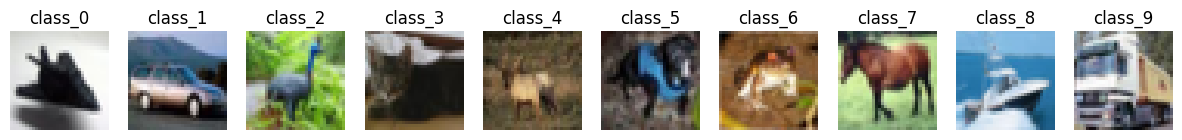

In [3]:
#display the images
n = len(np.unique(y_train))
plt.figure(figsize=(15, 10))
for i in range(n):
    img = x_train[y_train.flatten()==i][0]
    ax = plt.subplot(1, n, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("class_" + str(i))

In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0


In [5]:
num_classes = 10
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
# Define the two models to benchmark
models = [
    ('Model 1', Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])),
    ('Model 2', Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ]))
]


#SGD Model


In [7]:
for name, model in models:
    model.compile(optimizer=SGD(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8720 - accuracy: 0.3298 - val_loss: 1.7780 - val_accuracy: 0.3717
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6852 - accuracy: 0.4017 - val_loss: 1.6479 - val_accuracy: 0.4141
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6068 - accuracy: 0.4300 - val_loss: 1.6381 - val_accuracy: 0.4112
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5508 - accuracy: 0.4501 - val_loss: 1.5637 - val_accuracy: 0.4471
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5078 - accuracy: 0.4666 - val_loss: 1.5587 - val_accuracy: 0.4423
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4704 - accuracy: 0.4800 - val_loss: 1.5387 - val_accuracy: 0.4506
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4401 - accuracy: 0.4890 - val_loss: 1.4963 - val_ac

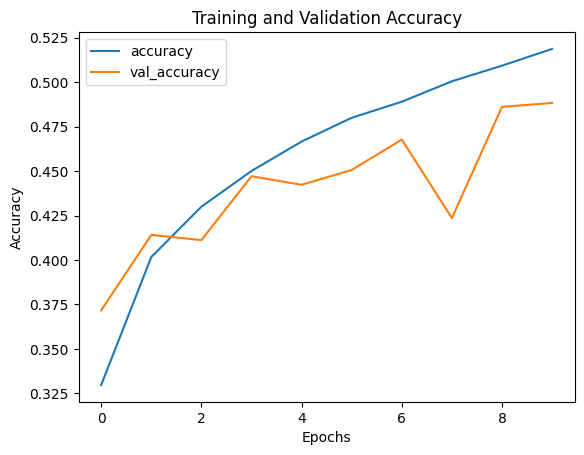

In [9]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
#evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.4411 - accuracy: 0.4883
0.48829999566078186


# Gradient Descent with Momentum Optimizer


In [11]:
for name, model in models:
  model.compile(optimizer=SGD(momentum=0.9),
              loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7345 - accuracy: 0.3762 - val_loss: 1.6334 - val_accuracy: 0.4118
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6097 - accuracy: 0.4209 - val_loss: 1.5834 - val_accuracy: 0.4363
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5436 - accuracy: 0.4471 - val_loss: 1.5295 - val_accuracy: 0.4500
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.5044 - accuracy: 0.4592 - val_loss: 1.5088 - val_accuracy: 0.4589
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4780 - accuracy: 0.4702 - val_loss: 1.4813 - val_accuracy: 0.4689
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4425 - accuracy: 0.4830 - val_loss: 1.4868 - val_accuracy: 0.4737
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4219 - accuracy: 0.4898 - val_loss: 1.4911 - val_ac

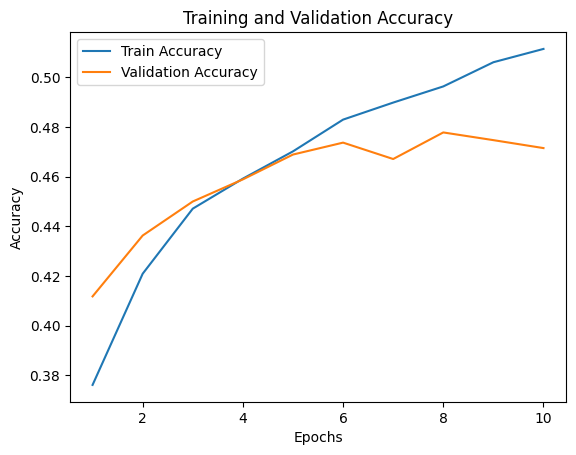

In [13]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.4764 - accuracy: 0.4715
0.4715000092983246


# Adagrad Optimizer

In [15]:
for name, model in models:
  model.compile(optimizer=Adagrad(),
              loss="categorical_crossentropy", metrics=["accuracy"])



In [16]:
history= model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.2082 - accuracy: 0.5679 - val_loss: 1.3448 - val_accuracy: 0.5250
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1725 - accuracy: 0.5801 - val_loss: 1.3361 - val_accuracy: 0.5278
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1613 - accuracy: 0.5850 - val_loss: 1.3315 - val_accuracy: 0.5290
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1536 - accuracy: 0.5865 - val_loss: 1.3300 - val_accuracy: 0.5301
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1482 - accuracy: 0.5889 - val_loss: 1.3268 - val_accuracy: 0.5308
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1438 - accuracy: 0.5916 - val_loss: 1.3265 - val_accuracy: 0.5308
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1402 - accuracy: 0.5919 - val_loss: 1.3246 -

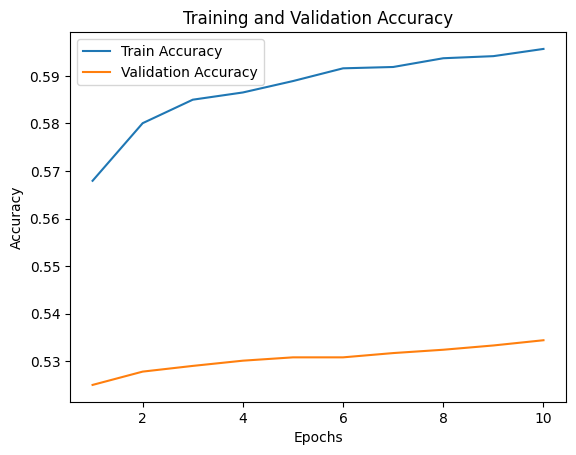

In [17]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.3211 - accuracy: 0.5344
0.5343999862670898


#RMS Model


In [19]:
for name, model in models:
  model.compile(optimizer=RMSprop(),
              loss="categorical_crossentropy", metrics=["accuracy"])


In [20]:
history= model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5244 - accuracy: 0.4648 - val_loss: 1.5588 - val_accuracy: 0.4578
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5354 - accuracy: 0.4639 - val_loss: 1.6045 - val_accuracy: 0.4448
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5469 - accuracy: 0.4613 - val_loss: 1.6519 - val_accuracy: 0.4212
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5526 - accuracy: 0.4619 - val_loss: 1.6297 - val_accuracy: 0.4297
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5690 - accuracy: 0.4558 - val_loss: 3.7514 - val_accuracy: 0.2459
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5662 - accuracy: 0.4559 - val_loss: 1.6321 - val_accuracy: 0.4432
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5523 - accuracy: 0.4599 - val_loss: 1.5589 -

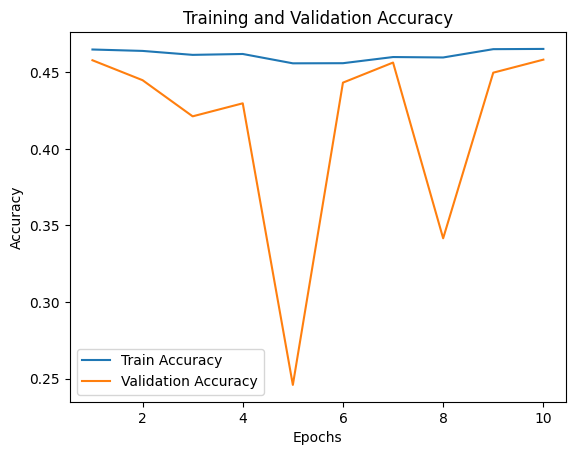

In [21]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.6046 - accuracy: 0.4582
0.45820000767707825


#Adam Model

In [23]:
for name, model in models:
  model.compile(optimizer=Adam(),
              loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
history= model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4525 - accuracy: 0.4799 - val_loss: 1.5350 - val_accuracy: 0.4491
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4043 - accuracy: 0.4957 - val_loss: 1.4998 - val_accuracy: 0.4838
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3696 - accuracy: 0.5080 - val_loss: 1.4927 - val_accuracy: 0.4843
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.3457 - accuracy: 0.5188 - val_loss: 1.5469 - val_accuracy: 0.4703
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3268 - accuracy: 0.5271 - val_loss: 1.4799 - val_accuracy: 0.4851
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3152 - accuracy: 0.5277 - val_loss: 1.4312 - val_accuracy: 0.4959
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2937 - accuracy: 0.5357 - val_loss: 1.4350 -

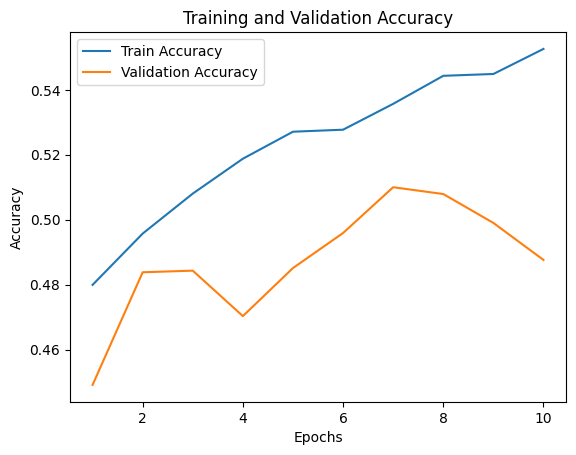

In [25]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.4683 - accuracy: 0.4876
0.4875999987125397


# Adagrad optimizer is the best one because it highest accuracy than other optimizers